# 收益率分析

In [1]:
import datetime as dt

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

## 准备数据

In [5]:
ticker = "BTC-USD"
start = dt.datetime(2012, 1, 1)
end = dt.datetime.today()
output_file = "../data/yahoo_btcusd.csv"

data = yf.download(ticker, start=start, end=end)
data.to_csv(output_file)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-03-22,65489.929688,66623.750000,62355.371094,63778.761719,63778.761719,41401116964
2024-03-23,63802.722656,65976.398438,63038.492188,64062.203125,64062.203125,24738964812
2024-03-24,64070.753906,67622.757812,63825.851562,67234.171875,67234.171875,27206630673


## 月收益率

将日数据重采样为月，计算每天平均，然后计算月收益率。

In [7]:
monthly_data = data.resample("MS").mean()
monthly_returns = monthly_data["Close"].pct_change().dropna()
monthly_returns.index = [monthly_returns.index.year, monthly_returns.index.month]
monthly_returns_df = monthly_returns.unstack(level=0)
monthly_returns_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# monthly_returns_df

In [8]:
def color_cell(val):
    if np.isnan(val):
        return "color: transparent"
    if val > 0.05:
        return "color: lime"
    elif val < -0.05:
        return "color: red"
    else:
        return "color: yellow"

monthly_returns_df.style.map(color_cell).format("{:.1%}")

Date,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Jan,nan%,-27.1%,-3.2%,10.5%,-14.4%,-0.4%,15.2%,58.1%,-16.5%,19.5%,0.9%
Feb,nan%,-5.9%,-1.6%,16.1%,-27.6%,0.3%,14.8%,33.2%,-0.9%,15.1%,16.2%
Mar,nan%,14.9%,3.0%,6.3%,-4.6%,7.1%,-28.7%,18.8%,3.0%,7.8%,34.8%
Apr,nan%,-12.5%,4.3%,6.8%,-11.1%,30.2%,5.1%,4.0%,-1.3%,14.9%,nan%
May,nan%,0.6%,6.4%,57.1%,5.2%,41.2%,28.2%,-18.8%,-23.5%,-4.7%,nan%
Jun,nan%,0.5%,39.2%,39.1%,-19.6%,28.8%,2.4%,-22.8%,-23.1%,1.0%,nan%
Jul,nan%,17.4%,2.9%,-4.4%,5.2%,13.3%,1.1%,-3.9%,-11.7%,8.3%,nan%
Aug,nan%,-10.3%,-12.4%,54.0%,-6.2%,-0.2%,21.5%,32.7%,3.8%,-7.3%,nan%
Sep,nan%,-6.8%,4.5%,4.7%,-1.3%,-7.8%,-8.5%,0.5%,-11.5%,-5.6%,nan%
Oct,-10.6%,13.4%,6.2%,31.9%,-1.9%,-14.3%,11.5%,26.1%,-0.8%,13.1%,nan%


## 季节性效应

计算月收益率，然后按照月份进行分类，创建箱线图，查看季节性效应。

In [9]:
monthly_data = data.resample("MS").mean()
monthly_data["return"] = monthly_data["Close"].pct_change()
monthly_data["month"] = monthly_data.index.month_name()
monthly_data.dropna(inplace=True)
# monthly_data

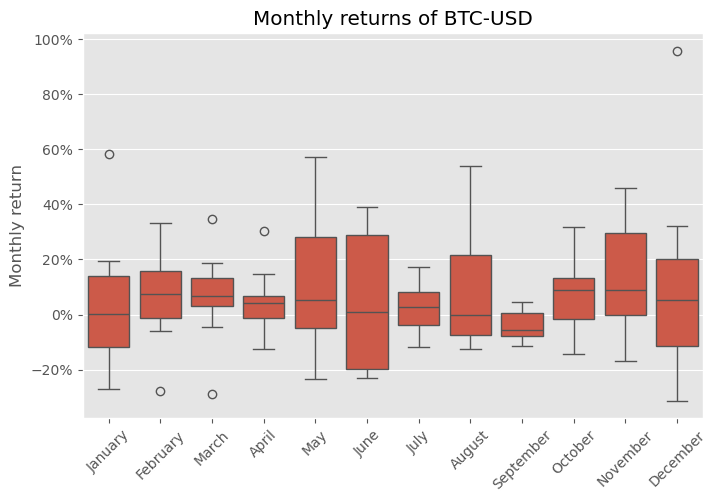

In [10]:
month_order_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x="month", y="return", data=monthly_data, ax=ax, order=month_order_list)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("")
ax.set_ylabel("Monthly return")
ax.yaxis.set_major_formatter(PercentFormatter(1))
_ = ax.set_title("Monthly returns of BTC-USD")